# Iris Classification using PyTorch

### Load the packages

In [1]:
import numpy as np
import pandas as pd
from ml_pipeline.data_input import inputData
from ml_pipeline.data_processing import processData
from ml_pipeline.data_processing import divideDataInXY
from ml_pipeline.data_processing import normalizeData
from ml_pipeline.data_processing import generateTrainAndTestXY
from ml_pipeline.data_processing import loadScalerObject
import torch
import copy
import matplotlib.pyplot as plt
from datetime import datetime
import json

### Reproducibility of the model

In [2]:
np.random.seed(4)

### Get data

In [3]:
df = inputData("csv")
df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Encode label in 0 to N-1 integers

In [4]:
df['label'] = np.where(df['label'] == 'Iris-setosa', 0, np.where(df['label'] == 'Iris-versicolor', 1, 2))
df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Select the columns to work with and shuffle the data

In [5]:
df2 = processData(df, columnsNamesToWorkWith = ['petal_length','petal_width','sepal_length','sepal_width','label'], shuffleData = True, substituteEmptyFields = False)
df2

,petal_length,petal_width,sepal_length,sepal_width,label
128,6.4,2.8,5.6,2.1,2
18,5.7,3.8,1.7,0.3,0
130,7.4,2.8,6.1,1.9,2
105,7.6,3.0,6.6,2.1,2
107,7.3,2.9,6.3,1.8,2
78,6.0,2.9,4.5,1.5,1
83,6.0,2.7,5.1,1.6,1
14,5.8,4.0,1.2,0.2,0
5,5.4,3.9,1.7,0.4,0
133,6.3,2.8,5.1,1.5,2


### Divide the data in X and Y datasets

In [6]:
Xdata, Ydata = divideDataInXY(df2, ['label'])

In [7]:
Xdata

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 2. , 3.5, 1. ],
       [4.7, 3.2, 1.3, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.4, 1.7, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3. , 4.5, 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5. , 2

In [8]:
Ydata

array([[2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [2],
    

### Normalize the X dataset and save the scaler object

In [9]:
Xdata = normalizeData(Xdata, fit_transform = True, scalerfilepath = "./savedmodelfolder/ModelScalerObject.joblib")
Xdata

array([[0.5833334 , 0.3333333 , 0.779661  , 0.83333325],
       [0.38888884, 0.74999994, 0.11864409, 0.08333333],
       [0.86111104, 0.3333333 , 0.8644068 , 0.74999994],
       [0.9166666 , 0.4166667 , 0.9491526 , 0.83333325],
       [0.8333334 , 0.37500006, 0.8983052 , 0.70833325],
       [0.4722222 , 0.37500006, 0.59322035, 0.5833333 ],
       [0.4722222 , 0.2916667 , 0.69491524, 0.625     ],
       [0.41666675, 0.8333333 , 0.03389831, 0.04166667],
       [0.30555558, 0.7916667 , 0.11864409, 0.125     ],
       [0.5555556 , 0.3333333 , 0.69491524, 0.5833333 ],
       [0.19444442, 0.4166667 , 0.10169491, 0.04166667],
       [0.13888896, 0.5833333 , 0.10169491, 0.04166667],
       [0.13888896, 0.4166667 , 0.0677966 , 0.        ],
       [0.5       , 0.37500006, 0.62711865, 0.5416666 ],
       [0.38888884, 0.20833331, 0.6779661 , 0.7916666 ],
       [0.16666663, 0.4583333 , 0.08474576, 0.        ],
       [0.19444442, 0.        , 0.42372882, 0.375     ],
       [0.11111104, 0.50000006,

### Divide the datasets in train and test datasets

In [10]:
trainX, trainY, testX, testY = generateTrainAndTestXY(Xdata, Ydata, splitfraction = 0.9)

In [11]:
trainX.shape

(135, 4)

In [12]:
trainY.shape

(135, 1)

In [13]:
testX.shape

(15, 4)

In [14]:
testY.shape

(15, 1)

### Validation set

In [15]:
valSplit = int(len(trainX) * 0.1) # 10% of the train dataset
valStartIndex = len(trainX) - valSplit
valX = trainX[valStartIndex:]
valY = trainY[valStartIndex:]

In [16]:
valX.shape

(13, 4)

In [17]:
valY.shape

(13, 1)

### Convert them to Pytorch tensors

In [18]:
trainXtensor = torch.autograd.Variable(torch.from_numpy(trainX).type(torch.FloatTensor), requires_grad=False)
trainYtensor = torch.autograd.Variable(torch.from_numpy(trainY).type(torch.LongTensor), requires_grad=False)
testXtensor = torch.autograd.Variable(torch.from_numpy(testX).type(torch.FloatTensor), requires_grad=False)
testYtensor = torch.autograd.Variable(torch.from_numpy(testY).type(torch.LongTensor), requires_grad=False)
valXtensor = torch.autograd.Variable(torch.from_numpy(valX).type(torch.FloatTensor), requires_grad=False)
valYtensor = torch.autograd.Variable(torch.from_numpy(valY).type(torch.LongTensor), requires_grad=False)

In [19]:
trainXtensor

tensor([[0.5833, 0.3333, 0.7797, 0.8333],
        [0.3889, 0.7500, 0.1186, 0.0833],
        [0.8611, 0.3333, 0.8644, 0.7500],
        [0.9167, 0.4167, 0.9492, 0.8333],
        [0.8333, 0.3750, 0.8983, 0.7083],
        [0.4722, 0.3750, 0.5932, 0.5833],
        [0.4722, 0.2917, 0.6949, 0.6250],
        [0.4167, 0.8333, 0.0339, 0.0417],
        [0.3056, 0.7917, 0.1186, 0.1250],
        [0.5556, 0.3333, 0.6949, 0.5833],
        [0.1944, 0.4167, 0.1017, 0.0417],
        [0.1389, 0.5833, 0.1017, 0.0417],
        [0.1389, 0.4167, 0.0678, 0.0000],
        [0.5000, 0.3750, 0.6271, 0.5417],
        [0.3889, 0.2083, 0.6780, 0.7917],
        [0.1667, 0.4583, 0.0847, 0.0000],
        [0.1944, 0.0000, 0.4237, 0.3750],
        [0.1111, 0.5000, 0.0508, 0.0417],
        [0.1389, 0.5833, 0.1525, 0.0417],
        [0.5556, 0.2917, 0.6610, 0.7083],
        [0.1944, 0.5000, 0.0339, 0.0417],
        [0.6667, 0.5417, 0.7966, 0.8333],
        [0.5278, 0.0833, 0.5932, 0.5833],
        [0.1944, 0.5833, 0.1017, 0

In [20]:
testXtensor

tensor([[0.0278, 0.4167, 0.0508, 0.0417],
        [0.2222, 0.7500, 0.1525, 0.1250],
        [0.6111, 0.4167, 0.7119, 0.7917],
        [0.1667, 0.1667, 0.3898, 0.3750],
        [0.3889, 0.3333, 0.5932, 0.5000],
        [0.3611, 0.2917, 0.5424, 0.5000],
        [0.8056, 0.6667, 0.8644, 1.0000],
        [0.5556, 0.3750, 0.7797, 0.7083],
        [0.6389, 0.3750, 0.6102, 0.5000],
        [0.5833, 0.4583, 0.7627, 0.7083],
        [0.7500, 0.5000, 0.6271, 0.5417],
        [0.5556, 0.1250, 0.5763, 0.5000],
        [0.6111, 0.4167, 0.8136, 0.8750],
        [0.8056, 0.4167, 0.8136, 0.6250],
        [0.9444, 0.3333, 0.9661, 0.7917]])

In [21]:
valXtensor

tensor([[0.5556, 0.2083, 0.6780, 0.7500],
        [0.6944, 0.5000, 0.8305, 0.9167],
        [0.3611, 0.4167, 0.5932, 0.5833],
        [0.1944, 0.5417, 0.0678, 0.0417],
        [0.0278, 0.3750, 0.0678, 0.0417],
        [0.1389, 0.4583, 0.1017, 0.0417],
        [0.9444, 0.7500, 0.9661, 0.8750],
        [0.5556, 0.5417, 0.6271, 0.6250],
        [0.2222, 0.7083, 0.0847, 0.1250],
        [0.2222, 0.6250, 0.0678, 0.0417],
        [1.0000, 0.7500, 0.9153, 0.7917],
        [0.7222, 0.4583, 0.6610, 0.5833],
        [0.5278, 0.3333, 0.6441, 0.7083]])

### Convert Y datasets to 1D tensors

In [22]:
trainYtensor = trainYtensor.squeeze_()
trainYtensor

tensor([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0,
        0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0,
        1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
        1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2,
        0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2])

In [23]:
testYtensor = testYtensor.squeeze_()
testYtensor

tensor([0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2])

In [24]:
valYtensor = valYtensor.squeeze_()
valYtensor

tensor([2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2])

### Create the PyTorch model

In [25]:
def MyPyTorchModel():
    # Use the nn package to define our model and loss function.
    model = torch.nn.Sequential(
        torch.nn.Linear(4, 5),
        torch.nn.ReLU(),
        torch.nn.Linear(5, 6),
        torch.nn.Linear(6, 3),
        torch.nn.Softmax()
    )
    
    loss_fn = torch.nn.CrossEntropyLoss()

    # Use the optim package to define an Optimizer that will update the weights of
    # the model for us. Here we will use Adam; the optim package contains many other
    # optimization algoriths. The first argument to the Adam constructor tells the
    # optimizer which Tensors it should update.
    learning_rate = 0.001
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    return model, loss_fn, optimizer

### Train the model

In [26]:
model, loss_fn, optimizer = MyPyTorchModel()

dictDataLoader = {"trainX":trainXtensor, "trainY":trainYtensor, "valX":valXtensor, "valY":valYtensor}

train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

max_epochs = 1000

for i in range(max_epochs):
    
    for mode in ['train', 'val']:
    
        running_loss = 0.0
        running_corrects = 0
        
        xTensor = dictDataLoader[mode + 'X']
        yTensor = dictDataLoader[mode + 'Y']
        
        optimizer.zero_grad()
            
        if mode == 'train':
            model.train()  # Set model to training mode
            
        else:
            model.eval()   # Set model to evaluate mode
            
        y_pred = model(xTensor)
        loss = loss_fn(y_pred, yTensor)
        
        _, preds = torch.max(y_pred.data, dim=1)

        # backward + optimize only if in training phase
        if mode == 'train':
            loss.backward()
            optimizer.step()

        epoch_loss = loss.item()
        epoch_corrects = torch.sum(preds == yTensor)
        epoch_acc = (epoch_corrects * 100.0 / len(yTensor))
        
        if mode == 'train':
            train_loss_history.append(epoch_loss)
            train_acc_history.append(epoch_acc)
            
        else:
            val_loss_history.append(epoch_loss)
            val_acc_history.append(epoch_acc)
            
        # deep copy the model
        if mode == 'val' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())

            
    if i % 100 == 0:
        print("Epoch : {}  Val_Loss : {}  Val_Acc : {}  Train_Loss : {}  Train_Acc : {}".format(i, val_loss_history[-1], val_acc_history[-1], train_loss_history[-1], train_acc_history[-1]))
        
        
# load best model weights
model.load_state_dict(best_model_wts)

c:\users\razrlab_sourav\appdata\local\programs\python\python36\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch : 0  Val_Loss : 1.101961612701416  Val_Acc : 38  Train_Loss : 1.1032159328460693  Train_Acc : 35
Epoch : 100  Val_Loss : 1.0681277513504028  Val_Acc : 46  Train_Loss : 1.0670382976531982  Train_Acc : 48
Epoch : 200  Val_Loss : 0.9402016997337341  Val_Acc : 53  Train_Loss : 0.9520991444587708  Train_Acc : 60
Epoch : 300  Val_Loss : 0.7945340871810913  Val_Acc : 76  Train_Loss : 0.8319883346557617  Train_Acc : 67
Epoch : 400  Val_Loss : 0.7433853149414062  Val_Acc : 92  Train_Loss : 0.7658860087394714  Train_Acc : 91
Epoch : 500  Val_Loss : 0.6934816837310791  Val_Acc : 100  Train_Loss : 0.7058590650558472  Train_Acc : 95
Epoch : 600  Val_Loss : 0.652734100818634  Val_Acc : 100  Train_Loss : 0.6608705520629883  Train_Acc : 96
Epoch : 700  Val_Loss : 0.6251564025878906  Val_Acc : 100  Train_Loss : 0.6327279210090637  Train_Acc : 97
Epoch : 800  Val_Loss : 0.6073126196861267  Val_Acc : 100  Train_Loss : 0.6156864762306213  Train_Acc : 96
Epoch : 900  Val_Loss : 0.5957481861114502  Va

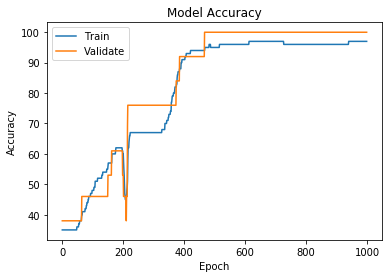

In [27]:
# Plot training & validation accuracy values
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

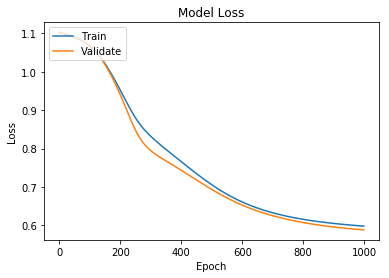

In [28]:
# Plot training & validation accuracy values
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

### Evaluate the model

In [29]:
def accuracy(model, X, Y):
    oupt = model(X)
    (_, arg_maxs) = torch.max(oupt.data, dim=1)
    
    num_correct = torch.sum(Y == arg_maxs)
    acc = (num_correct * 100.0 / len(Y))
    
    return acc.item()

In [30]:
model = model.eval() # set eval mode
eval1 = accuracy(model, testXtensor, testYtensor)
eval1

93

### Save the model

In [31]:
torch.save(model, "./savedmodelfolder/IrisModel.pt")

### Load the model

In [32]:
model = torch.load("./savedmodelfolder/IrisModel.pt")

### Predict data

In [33]:
model = model.eval() # set eval mode
logits = model(testXtensor)
probs_t = torch.softmax(logits, dim=1)
_, probs_t = torch.max(probs_t, dim=1)
probs_t

tensor([0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2])

In [34]:
testYtensor

tensor([0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2])

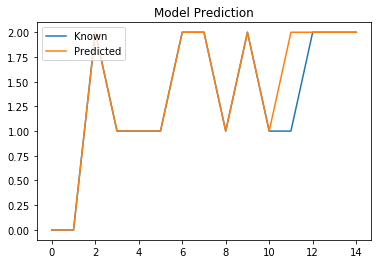

In [37]:
# Plot known and predicted values
plt.plot(testYtensor.numpy())
plt.plot(probs_t.numpy())
plt.title('Model Prediction')
plt.legend(['Known', 'Predicted'], loc='upper left')
plt.show()